## Exemple simple sur l'apprentissage d'une fonction de décision de jouer au tenis.

1. Les variables prédictives : Outlook, Température, Force du vent, Humidité.
2. La variable cible: play
3. 14 Observations constituant le dataset en format CSV.

In [4]:
#importation du jeu données. dataset
import pandas as pd
df = pd.read_csv('weather.csv')
df.shape

(14, 5)

In [5]:
df.head(14)

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [7]:
#Nous devons recoder toutes les variables prédictives nominales 
nouv_df=pd.get_dummies(df[df.columns[:-1]])

In [8]:
nouv_df

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal
0,False,False,False,True,False,True,False,True,False
1,True,False,False,True,False,True,False,True,False
2,False,True,False,False,False,True,False,True,False
3,False,False,True,False,False,False,True,True,False
4,False,False,True,False,True,False,False,False,True
5,True,False,True,False,True,False,False,False,True
6,True,True,False,False,True,False,False,False,True
7,False,False,False,True,False,False,True,True,False
8,False,False,False,True,True,False,False,False,True
9,False,False,True,False,False,False,True,False,True


In [9]:
#Nous allons compléter le dataFrame nouv_df avec la variable cible
nouv_df['class'] = df['play']

In [10]:
nouv_df

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,class
0,False,False,False,True,False,True,False,True,False,no
1,True,False,False,True,False,True,False,True,False,no
2,False,True,False,False,False,True,False,True,False,yes
3,False,False,True,False,False,False,True,True,False,yes
4,False,False,True,False,True,False,False,False,True,yes
5,True,False,True,False,True,False,False,False,True,no
6,True,True,False,False,True,False,False,False,True,yes
7,False,False,False,True,False,False,True,True,False,no
8,False,False,False,True,True,False,False,False,True,yes
9,False,False,True,False,False,False,True,False,True,yes


## Entrainement d'un DT

In [22]:
#Importation de la classe DecisionTreeClassifier

#en utilisant le nouveau dataframe modifié.: nouv_df au lieu de df.

from sklearn.tree import DecisionTreeClassifier
arbre= DecisionTreeClassifier(criterion="entropy",min_samples_split=2,min_samples_leaf=2,max_leaf_nodes=6)
#arbre= DecisionTreeClassifier(criterion="entropy")
arbre.fit(X=nouv_df.iloc[:,:-1], y=nouv_df['class'])

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6,
                       min_samples_leaf=2)

[Text(0.625, 0.875, 'outlook_overcast <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.5, 0.625, 'humidity_normal <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.375, 'outlook_rainy <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.375, 'windy <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

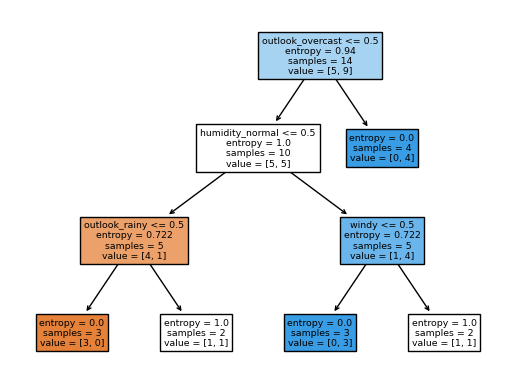

In [23]:
#affichage de l'arbre
%matplotlib inline
from sklearn.tree import plot_tree
plot_tree(arbre, feature_names=list(nouv_df.columns[:-1]), filled=True)

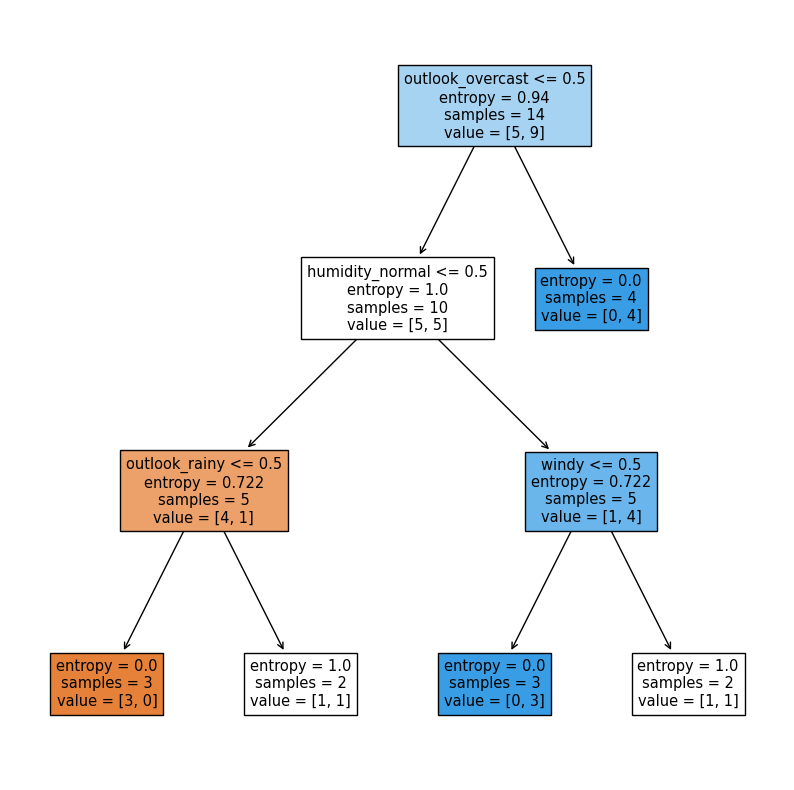

In [24]:
#affichage avec une meilleure visibilité
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(arbre, feature_names=list(nouv_df.columns),filled=True)
plt.show()

In [25]:
#affichage sous forme de règles quand l'arbre est très grand
#l'argument show_weight pour demander d'indiquer les effectifs aux niveaux feuilles
from sklearn.tree import export_text
regles_arbre= export_text(arbre, feature_names=list(nouv_df.columns[:-1]), show_weights=True)

In [26]:
print (regles_arbre)

|--- outlook_overcast <= 0.50
|   |--- humidity_normal <= 0.50
|   |   |--- outlook_rainy <= 0.50
|   |   |   |--- weights: [3.00, 0.00] class: no
|   |   |--- outlook_rainy >  0.50
|   |   |   |--- weights: [1.00, 1.00] class: no
|   |--- humidity_normal >  0.50
|   |   |--- windy <= 0.50
|   |   |   |--- weights: [0.00, 3.00] class: yes
|   |   |--- windy >  0.50
|   |   |   |--- weights: [1.00, 1.00] class: no
|--- outlook_overcast >  0.50
|   |--- weights: [0.00, 4.00] class: yes

